In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2 as cv2
import os
from tqdm import tqdm
from zipfile import ZipFile

import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.models import Model
from matplotlib import pyplot
from numpy import expand_dims
from matplotlib import pyplot

import warnings
warnings.filterwarnings('ignore')

# MAX & AVG pooling

In [2]:
def drawImg(img):
    plt.imshow(img,cmap='gray')
    plt.axis("off")
    plt.show()

In [3]:
path = './input/cat4.jpg'

In [4]:
image = load_img(path , target_size=(224,224))

# convert the image to an array
image = img_to_array(image)
# expand dimensions so that it represents a single 'sample'
# image = expand_dims(image, axis=0)

(158, 181, 3)
(158, 181)


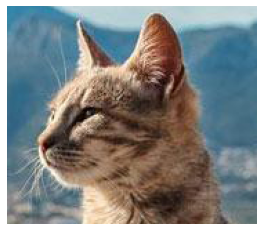

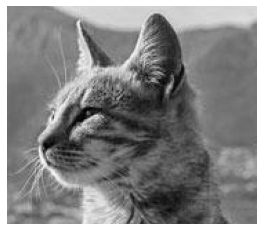

In [5]:
img_ = cv2.imread(path)
# img_ = cv2.resize(img_, (500, 500))
print(img_.shape)
img = cv2.cvtColor(img_, cv2.COLOR_BGR2RGB)
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img_gray2 = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
print(img_gray.shape)
drawImg(img)
drawImg(img_gray)


In [6]:
img_gray.shape

(158, 181)

In [7]:
def pooling(X, mode="max"):
    stride = 2
    f = 2
    H, W = X.shape

    HO = int((H-f)/stride) + 1
    WO = int((W-f)/stride) + 1
    output = np.zeros((HO, WO))
    for r in range(HO):

        for c in range(WO):
            r_start = r*stride
            r_end = r_start + f
            c_start = c*stride
            c_end = c_start + f
            X_slice = X[r_start:r_end, c_start:c_end]
            if mode == "max":
                output[r][c] = np. max(X_slice)
            else:
                output[r][c] = np. mean(X_slice)
    return output


In [8]:
out = pooling(img_gray,'mean')


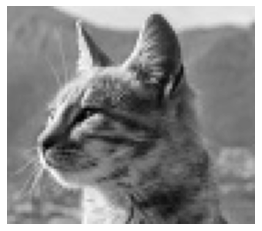

In [9]:
drawImg(out)

1 (79, 90)


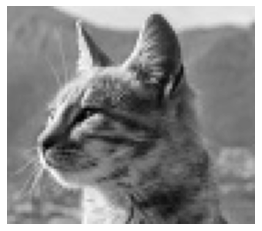

2 (39, 45)


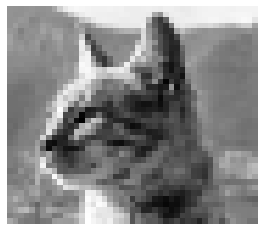

3 (19, 22)


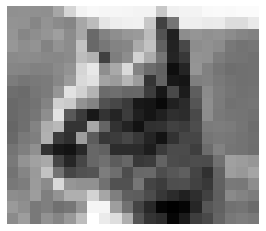

4 (9, 11)


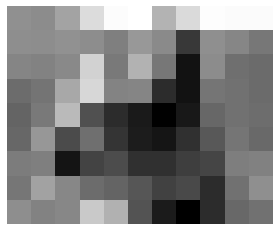

5 (4, 5)


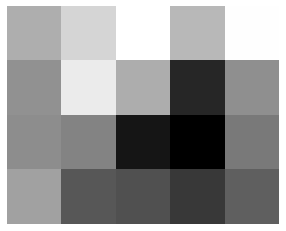

6 (2, 2)


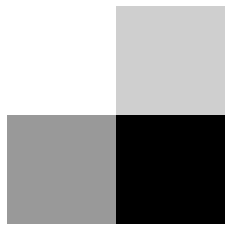

7 (1, 1)


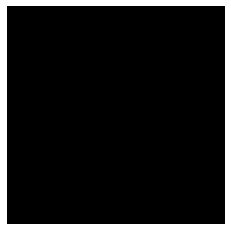

In [10]:
imggg = img_gray
out = []
# prev = img
i=1
while imggg.shape!=(1,1):
    imggg = pooling(imggg,'mean')
    out.append(imggg)
    print(i, imggg.shape)
    i+=1
    drawImg(imggg)
    

In [11]:
out[6]
print(out[-2])
th =out[-1]
print(th)

[[141.93066406 129.61450195]
 [115.92260742  77.23095703]]
[[116.17468262]]


Obtained threshold:  144.0


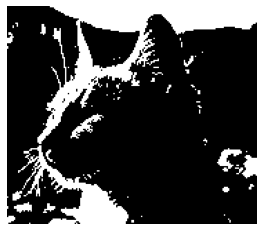

In [12]:
otsu_threshold, image_result = cv2.threshold(img_gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU,)

print("Obtained threshold: ", otsu_threshold)
drawImg(image_result)

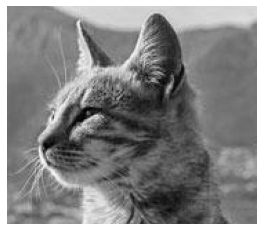

[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ...   0   0   0]
 [255 255 255 ...   0   0   0]
 [255 255 255 ...   0   0   0]]


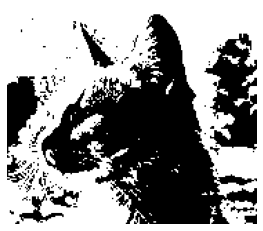

In [13]:
img1 = img_gray
# print(img1)
drawImg(img1)
H, W = img1.shape
for r in range(H):
    for c in range(W):
        if img1[r][c]>th:
            img1[r][c]=255
        else:
            img1[r][c]=0
print(img1)
drawImg(img1)

In [14]:
ar = out[-2]
ar = ar.ravel()
ar

array([141.93066406, 129.61450195, 115.92260742,  77.23095703])

In [15]:
sorted(ar)

[77.23095703125, 115.922607421875, 129.614501953125, 141.9306640625]

In [16]:
from scipy import stats as st

In [17]:
median = np.median(ar)
mode = st.mode(ar)
mode = np.array(mode)
mode = mode[0][0]

In [18]:
print("Mode :",mode)
print("Median :",median)
print("Mean: ",th[0][0])

Mode : 77.23095703125
Median : 122.7685546875
Mean:  116.1746826171875


In [19]:
def binarize(img1,th):
    H, W = img1.shape
    for r in range(H):
        for c in range(W):
            if img1[r][c]>th:
                img1[r][c]=255
            else:
                img1[r][c]=0
    return img1

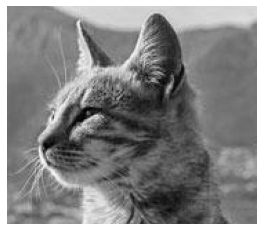

In [20]:
imgtest1 = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
imgtest2 = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
imgtest3 = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
drawImg(imgtest1)

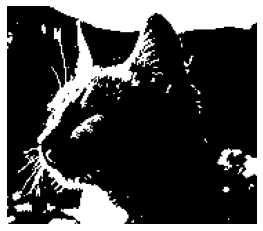

In [21]:
# print("Mode :",mode)
drawImg(binarize(imgtest1,145))

Mode : 77.23095703125


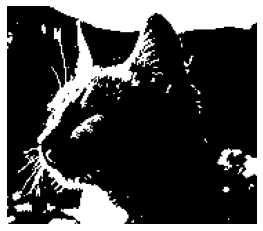

Median : 122.7685546875


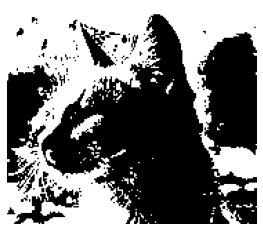

Mean:  116.1746826171875


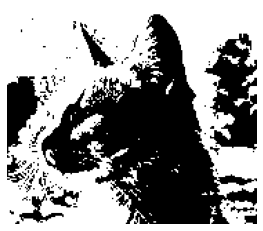

In [22]:
print("Mode :",mode)
drawImg(binarize(imgtest1,mode))
print("Median :",median)
drawImg(binarize(imgtest2,median))
print("Mean: ",th[0][0])
drawImg(binarize(imgtest3,th[0][0]))

In [23]:
np.std(ar)

24.293397397290978

In [24]:
np.std(out[0])

45.06893367084086

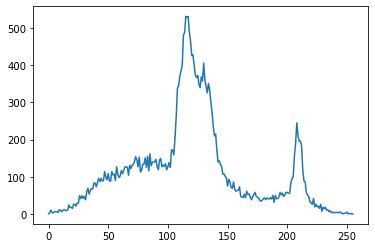

In [25]:
# load an image in grayscale mode
  
# calculate frequency of pixels in range 0-255
histg = cv2.calcHist([img_gray2],[0],None,[256],[0,256]) 
plt.plot(histg)
plt.show()